In [355]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [356]:
import numpy as np
import pandas as pd

In [357]:
import datetime as dt
import time as strftime

# Reflect Tables into SQLAlchemy ORM

In [358]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [359]:
# Choose a start date and end date of the trip. Make sure that your vacation range is approximately 3-15 days total.
# Note: There is no data after 2017-08-23. 
start_date_entry = input('Enter the start date for your trip to Honolulu in YYYY-MM-DD format: ')
year, month, day = map(int, start_date_entry.split('-'))
trip_start_date = dt.date(year, month, day)

end_date_entry = input('Enter the end date for your trip to Honolulu in YYYY-MM-DD format: ')
year, month, day = map(int, end_date_entry.split('-'))
trip_end_date = dt.date(year, month, day)

Enter the start date for your trip to Honolulu in YYYY-MM-DD format: 2017-07-21
Enter the end date for your trip to Honolulu in YYYY-MM-DD format: 2017-08-01


In [360]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [361]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [362]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [363]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [364]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [365]:
# Display a sample of the row's columns and data in dictionary format for measurement table
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121a91f98>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [366]:
# Display a sample of the row's columns and data in dictionary format for station table
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12242a438>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [367]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
date_year_ago = trip_end_date - dt.timedelta(365)
start_date_year_ago = trip_start_date - dt.timedelta(365)  

In [369]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= trip_end_date, Measurement.date >= date_year_ago).\
                group_by(Measurement.date).all()
precipitation

[('2016-08-01', 2.21),
 ('2016-08-02', 1.14),
 ('2016-08-03', None),
 ('2016-08-04', None),
 ('2016-08-05', None),
 ('2016-08-06', None),
 ('2016-08-07', 1.3),
 ('2016-08-08', 0.02),
 ('2016-08-09', 0.56),
 ('2016-08-10', 0.0),
 ('2016-08-11', 0.04),
 ('2016-08-12', 0.39),
 ('2016-08-13', 0.45),
 ('2016-08-14', 0.75),
 ('2016-08-15', 0.95),
 ('2016-08-16', 0.85),
 ('2016-08-17', 0.3),
 ('2016-08-18', 0.21),
 ('2016-08-19', 2.3),
 ('2016-08-20', 0.2),
 ('2016-08-21', 1.08),
 ('2016-08-22', 1.2),
 ('2016-08-23', 0.7),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', None),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.44),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),


In [370]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation, columns=["date", "precipitation"])
precipitation_df.set_index('date', inplace=True)
precipitation_df.sort_values(by='date')
precipitation_df.head()

,precipitation
date,
2016-08-01,2.21
2016-08-02,1.14
2016-08-03,NaN
2016-08-04,NaN
2016-08-05,NaN


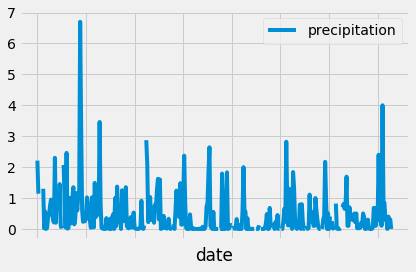

In [371]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the dataframe as a chart using pandas plotting
precipitation_df.plot()
plt.tight_layout()
plt.show()

In [372]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,347.000000
mean,0.458703
std,0.720159
min,0.000000
25%,0.010000
50%,0.180000
75%,0.680000
max,6.700000


In [373]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Station.station).count()
number_of_stations

9

In [374]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_counts = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [375]:
# Station that has the highest number of observations
most_active = stations_counts[0][0]
number_of_observations = stations_counts[0][1]
print('The most active station is {} with {} obrservations.'.format(most_active, number_of_observations))

The most active station is USC00519281 with 2772 obrservations.


In [376]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temperature_most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()
temperature_most_active

[(54.0, 85.0, 71.66378066378067)]

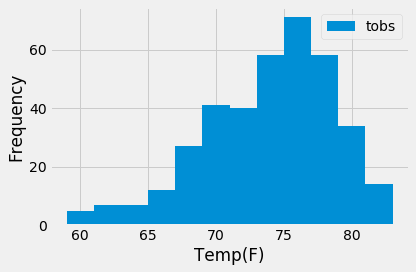

In [377]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= date_year_ago, Measurement.station == most_active).all()
last12_tobs_df = pd.DataFrame(last12_tobs, columns = ['date', 'tobs'])
last12_tobs_df.iloc[::-1].plot.hist(bins = 12)
plt.ylabel('Frequency')
plt.xlabel('Temp(F)')
plt.tight_layout()
plt.show()

In [378]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


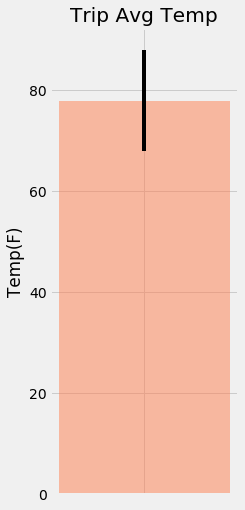

[(73.0, 77.91044776119404, 83.0)]


In [379]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
     trip_temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
     tmin = trip_temp[0][0]                     
     tavg = trip_temp[0][1]
     tmax = trip_temp[0][2]
         
     # Plot the results from your previous query as a bar chart. 
     # Use "Trip Avg Temp" as your Title
     # Use the average temperature for the y value
     # Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
     
     plt.figure(figsize=(3,8))
     plt.bar(1, tavg, yerr= tmax - tmin, tick_label="", color = 'coral', alpha = 0.5)
     plt.title('Trip Avg Temp')
     plt.ylabel('Temp(F)')
     plt.show()
     
     return trip_temp

print(calc_temps('2016-07-21', '2016-08-01'))


In [380]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_prcp = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp))\
            .filter(Measurement.station == Station.station)\
            .filter(Measurement.date >= start_date_year_ago)\
            .filter(Measurement.date <= date_year_ago)\
            .group_by(Station.station)\
            .order_by(func.sum(Measurement.prcp).desc()).all()
                         
print(trip_prcp)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 14.92), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 13.73), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 10.51), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 4.66), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 4.53), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.060000000000000005), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.01)]


## Optional Challenge Assignment

In [381]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

daily_normals("07-21")

[(69.0, 76.9245283018868, 83.0)]

In [382]:
# calculate the daily normals for your trip
def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    [(tmin,tavg,tmax)] = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
  
    return tmin,tavg,tmax

In [383]:
# Push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start = trip_start_date

# Use the start and end date to create a range of dates
tdelta = dt.timedelta(days=1)
date_range = []
while start <= trip_end_date:
    date_range.append(start)
    start += tdelta

# Strip off the year and save a list of %m-%d strings
month_day_range = []
for everydate in date_range:
    month = everydate.strftime('%m')
    day = everydate.strftime('%d')
    month_day_range.append(month +'-'+ day)

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for month_day in month_day_range:
        tmax,tmin,tavg = daily_normals(month_day)
        normals.append({"date": month_day, "tmax": tmax, "tmin": tmin, "tavg":tavg})
temp_ranges

[{'date': '07-21', 'tmax': 69.0, 'tmin': 76.9245283018868, 'tavg': 83.0},
 {'date': '07-22', 'tmax': 69.0, 'tmin': 75.78846153846153, 'tavg': 81.0},
 {'date': '07-23', 'tmax': 70.0, 'tmin': 76.20370370370371, 'tavg': 84.0},
 {'date': '07-24', 'tmax': 69.0, 'tmin': 76.55555555555556, 'tavg': 81.0},
 {'date': '07-25', 'tmax': 67.0, 'tmin': 76.89090909090909, 'tavg': 84.0},
 {'date': '07-26', 'tmax': 71.0, 'tmin': 76.4423076923077, 'tavg': 86.0},
 {'date': '07-27', 'tmax': 68.0, 'tmin': 76.58181818181818, 'tavg': 83.0},
 {'date': '07-28', 'tmax': 69.0, 'tmin': 76.46428571428571, 'tavg': 82.0},
 {'date': '07-29', 'tmax': 69.0, 'tmin': 76.47058823529412, 'tavg': 83.0},
 {'date': '07-30', 'tmax': 69.0, 'tmin': 77.35185185185185, 'tavg': 84.0},
 {'date': '07-31', 'tmax': 72.0, 'tmin': 77.03571428571429, 'tavg': 83.0},
 {'date': '08-01', 'tmax': 67.0, 'tmin': 75.54, 'tavg': 83.0},
 {'date': '07-21', 'tmax': 69.0, 'tmin': 76.9245283018868, 'tavg': 83.0},
 {'date': '07-22', 'tmax': 69.0, 'tmin':

In [384]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals)
normals_df.set_index('date', inplace=True)
normals_df.head()

,tavg,tmax,tmin
date,,,
07-21,83.0,69.0,76.924528
07-22,81.0,69.0,75.788462
07-23,84.0,70.0,76.203704
07-24,81.0,69.0,76.555556
07-25,84.0,67.0,76.890909


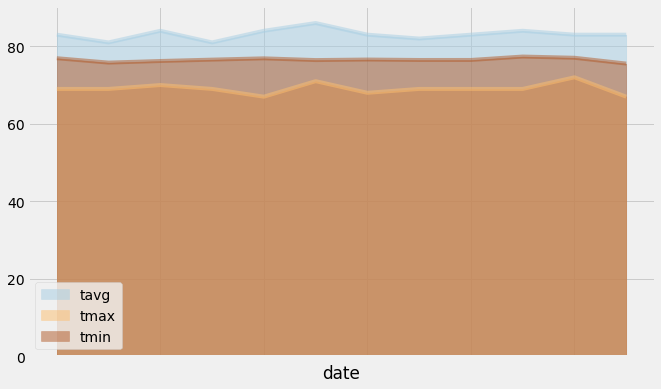

In [385]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot(figsize=(10,6), rot=45, kind='area', stacked=False, alpha=0.5, colormap='Paired')
plt.show()